The datasets in which we will be using here were obtained via open sources.

---

Let's begin with importing our needed libraries.

In [1]:
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [16,9]
plt.style.use('fivethirtyeight')

Here, we will be practicing with time series data. Let's begin with a look at some Apple stock data.

In [2]:
# Let's read in the data #
aapl = pd.read_csv('./data/aapl.csv')
aapl.head()

,Date,Open,High,Low,Close,Volume
0,13-Jan-17,119.11,119.62,118.81,119.04,26111948
1,12-Jan-17,118.90,119.30,118.21,119.25,27086220
2,11-Jan-17,118.74,119.93,118.60,119.75,27588593
3,10-Jan-17,118.77,119.38,118.30,119.11,24462051
4,9-Jan-17,117.95,119.43,117.94,118.99,33561948


In [3]:
# Let's take a look at some statistics #
aapl.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,105.155100,106.060518,104.392550,105.292191,3.674495e+07
std,7.905047,7.876708,7.995679,7.963102,1.609059e+07
min,90.000000,91.670000,89.470000,90.340000,1.147592e+07
25%,97.355000,98.220000,96.690000,97.340000,2.665144e+07
50%,106.270000,107.270000,105.500000,106.100000,3.229234e+07
75%,111.450000,112.370000,110.700000,111.750000,4.137394e+07
max,119.110000,119.930000,118.810000,119.750000,1.322245e+08


In [4]:
# Let's check the data types #
aapl.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [5]:
# Let's convert the date column a datetime object # 
aapl['Date'] = pd.to_datetime(aapl.Date)
aapl.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


In [6]:
# Let's check the data types again #
aapl.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [7]:
# Let's use a timestamp as a comparison with our Apple stock data #
ts = pd.to_datetime('1/1/2017')
aapl.loc[aapl.Date >= ts, :].sample(5)

,Date,Open,High,Low,Close,Volume
4,2017-01-09,117.95,119.43,117.94,118.99,33561948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
6,2017-01-05,115.92,116.86,115.81,116.61,22193587
0,2017-01-13,119.11,119.62,118.81,119.04,26111948


In [8]:
# Let's set the date column to the index of the dataframe #
aapl.set_index('Date', inplace=True)
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-13,119.11,119.62,118.81,119.04,26111948
2017-01-12,118.90,119.30,118.21,119.25,27086220
2017-01-11,118.74,119.93,118.60,119.75,27588593
2017-01-10,118.77,119.38,118.30,119.11,24462051
2017-01-09,117.95,119.43,117.94,118.99,33561948


In [9]:
# Now, we can also filter by date using pandas #
aapl['2017'].sample(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865
2017-01-13,119.11,119.62,118.81,119.04,26111948
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-10,118.77,119.38,118.30,119.11,24462051


Let's quickly recap using an UFO dataset from the internet.

In [10]:
# Let's read in the data #
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [11]:
# Let's check the data types #
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [12]:
# Let's convert the time column to a datetime object #
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [13]:
# Let's check the data types again #
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [14]:
# Let's set the time column to the index of the dataframe #
ufo.set_index('Time', inplace=True)
ufo.head()

,City,Colors Reported,Shape Reported,State
Time,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1931-06-01 13:00:00,Abilene,NaN,DISK,KS
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY


In [15]:
# Let's create a timestamp object for the date January 1, 1999 #
ts = pd.to_datetime('1/1/1999')

In [16]:
# Let's create a subset of entries using the timestamp we made and some logical filtering #
recent_ufos = ufo.loc[ufo.index >= ts, :]
recent_ufos.head()

,City,Colors Reported,Shape Reported,State
Time,,,,
1999-01-01 02:30:00,Loma Rica,NaN,LIGHT,CA
1999-01-01 03:00:00,Bauxite,NaN,NaN,AR
1999-01-01 14:00:00,Florence,NaN,CYLINDER,SC
1999-01-01 15:00:00,Lake Henshaw,NaN,CIGAR,CA
1999-01-01 17:15:00,Wilmington Island,NaN,LIGHT,GA


Let's practice with rolling statistics using dataset from mapquest.

In [17]:
# Let's read in the data #
df = pd.read_csv('./data/mapquest_google_trends.csv')
df.head()

,WeekOf,mapquest
0,2004-01-04,53
1,2004-01-11,53
2,2004-01-18,54
3,2004-01-25,53
4,2004-02-01,52


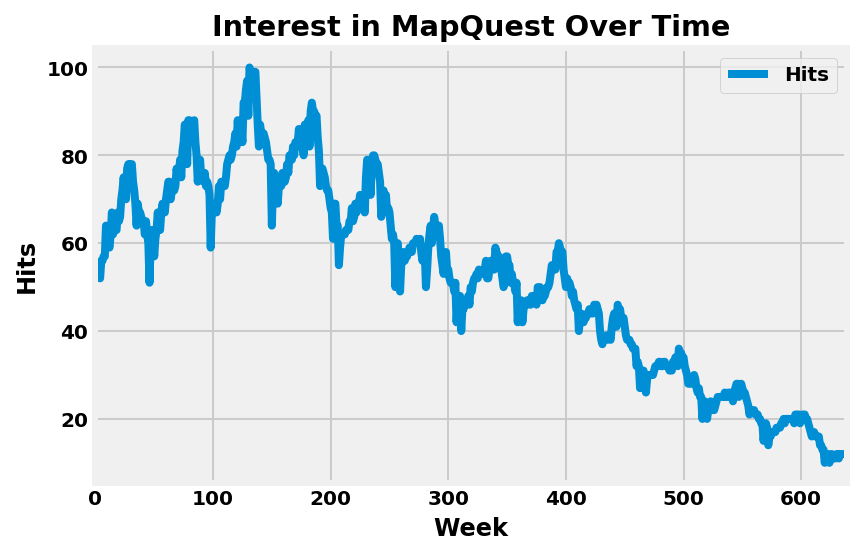

In [18]:
# Let's organize the data and visualize #
df.columns = ['WeekOf', 'Hits']

ax = df.plot(title = "Interest in MapQuest Over Time");
ax.set_xlabel("Week");
ax.set_ylabel("Hits");

The easiest way to visualize trends is by drawing trend lines.

In [19]:
# Let's compute a coefficient and intercept for our line #
line_coef = np.polyfit(df.index,df['Hits'],1)
print('coefficient:',line_coef)

polynomial = np.poly1d(line_coef)

# Let's take a look at the trendline values at specific points #
print(polynomial(0))
print(polynomial(3))

coefficient: [-0.10841388 86.58979622]
86.58979621684865
86.26455458570453


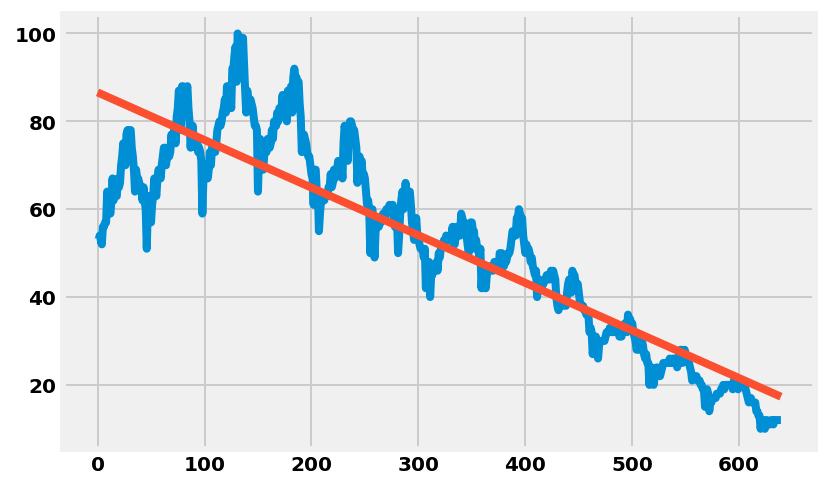

In [20]:
# Now, let's plot our trendline over the data #
plt.plot(df.index, df['Hits']);

plt.plot(df.index, polynomial(df.index));

coefficient: [-1.84964781e-04  9.77861827e-03  7.40219942e+01]


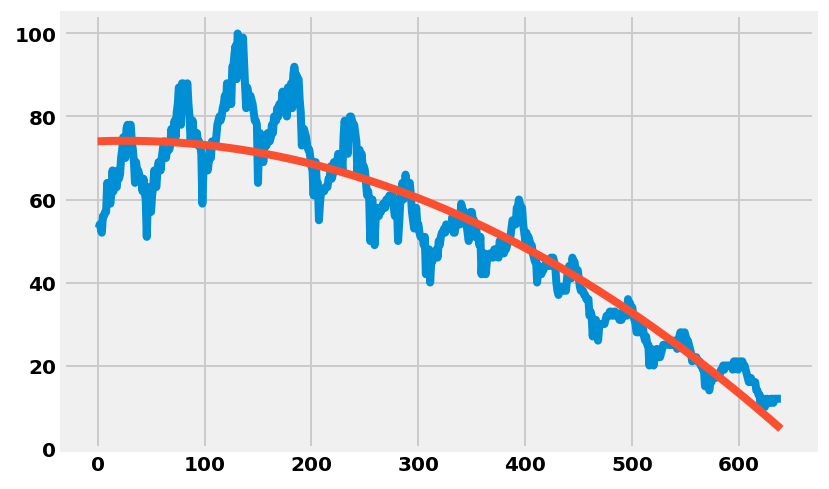

In [21]:
# Now, let's try a second-order polynomial for a better fit #
line_coef = np.polyfit(df.index,df['Hits'],2)
print('coefficient:',line_coef)

second_polynomial = np.poly1d(line_coef)

plt.plot(df.index, df['Hits']);

plt.plot(df.index, second_polynomial(df.index));

Let's continue by looking for trends and seasonality in data made available by a German drugstore, Rossmann. The dataset contains the daily sales made at the drugstore, as well as whether or not a sale or holiday affected the data.

In [22]:
# Let's read in the data #
data = pd.read_csv('./data/rossmann.csv', skipinitialspace=True, low_memory=False)
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [23]:
# Let's convert the date column to a datetime object and set as index #
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [24]:
# Let's add a column for Year and Month based on the datetime index #
data['Year'] = data.index.year
data['Month'] = data.index.month

data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [25]:
# There seems be many different stores within the dataset. Let's focus on just one store for now #
store1_data = data[data['Store'] == 1]
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7


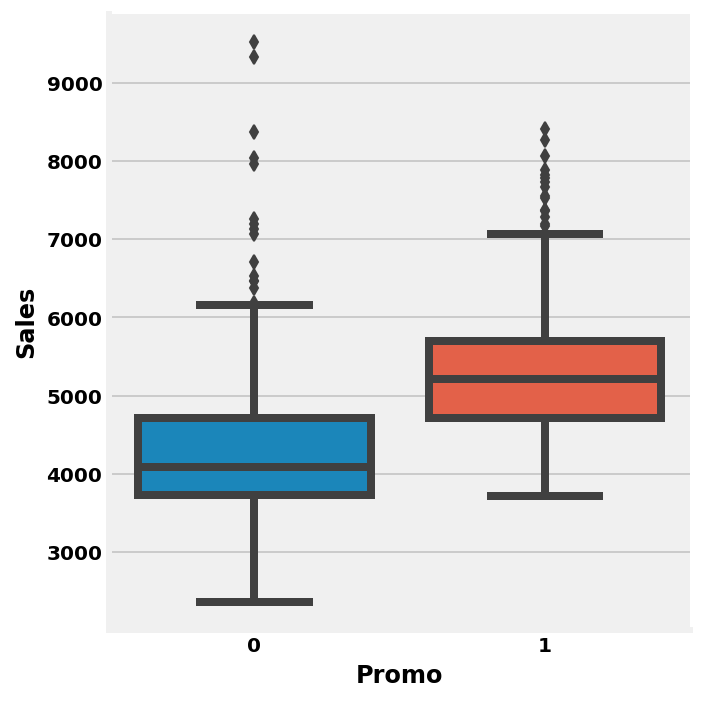

In [26]:
# Let's investigate whether or not promotions affect sales by plotting #
sns.catplot(
    x='Promo',
    y='Sales',
    data=store1_data[store1_data['Open']==1],
    kind='box'
);

We can see above that there is a difference in sales on promotion days.

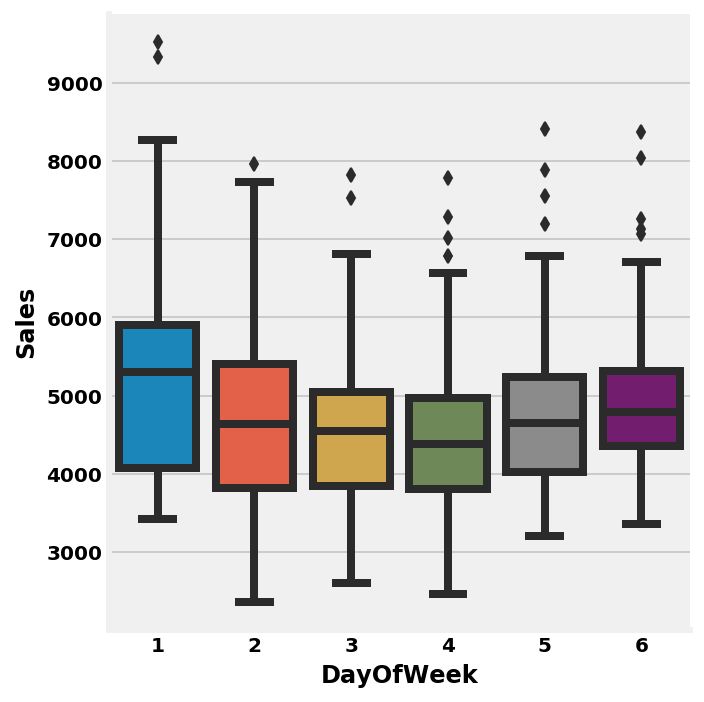

In [27]:
# Let's also compare sales across days of the week #
sns.catplot(
    x='DayOfWeek',
    y='Sales',
    data=store1_data[store1_data['Open']==1],
    kind='box',
);

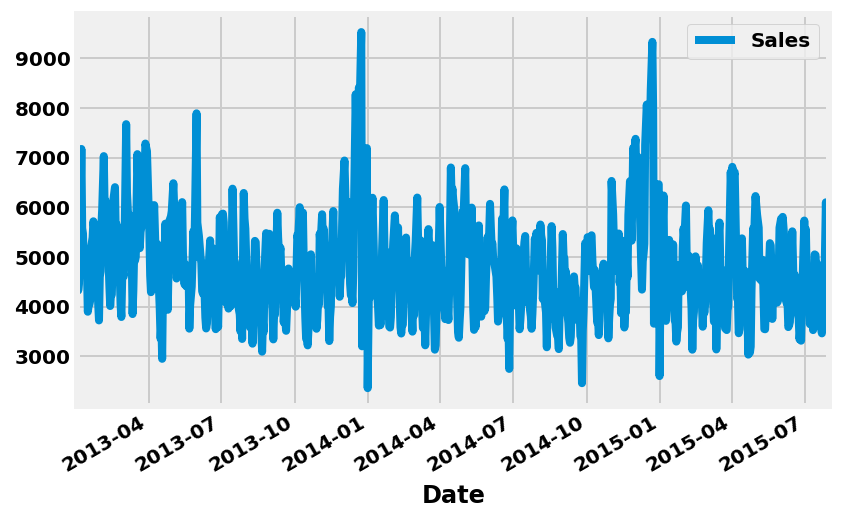

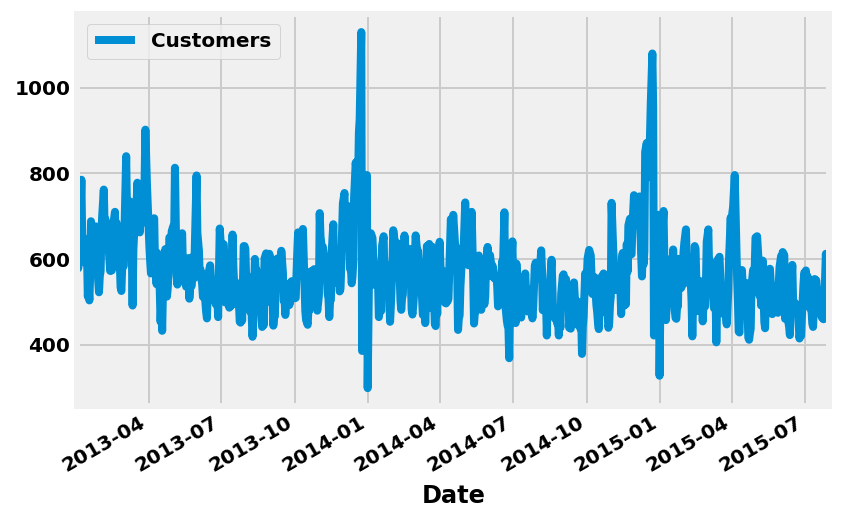

In [28]:
# Let's plot the sales and customer visits over time #
store1_open_data = store1_data[store1_data['Open']==1]
store1_open_data[['Sales']].plot();
store1_open_data[['Customers']].plot();

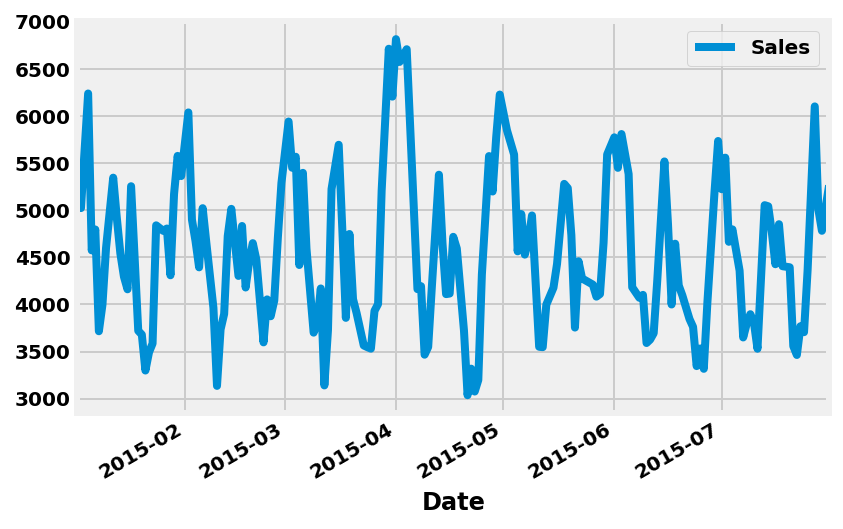

In [29]:
# Let's use index filtering to see how only 2015 changes over time # 
# This should make it easier to identify the holiday sales bump #
store1_data_2015 = store1_data['2015']
store1_data_2015[store1_data_2015.Open==1][['Sales']].plot();

If we want to investigate trends over time in sales, as always, we'll start by computing simple aggregates. Let's find the mean and median sales in each month and year.

In [30]:
# Let's check the mean values for each year within the dataset #
data[['Sales']].resample('A').mean()

,Sales
Date,
2013-12-31,5658.533675
2014-12-31,5833.290704
2015-12-31,5878.245380


In [31]:
# Let's check the median values for each year within the dataset #
data[['Sales']].resample('A').median()

,Sales
Date,
2013-12-31,5598
2014-12-31,5794
2015-12-31,5916


In [32]:
# Let's check the mean values for each month within the dataset #
data[['Sales']].resample('M').mean()

,Sales
Date,
2013-01-31,5211.555578
2013-02-28,5494.371397
2013-03-31,5820.349168
2013-04-30,5483.749836
2013-05-31,5364.127383
2013-06-30,5402.162960
2013-07-31,6042.062260
2013-08-31,5729.574049
2013-09-30,5322.988430


In [33]:
# Let's check the median values for each month within the dataset #
data[['Sales']].resample('M').median()

,Sales
Date,
2013-01-31,5194.0
2013-02-28,5421.5
2013-03-31,5844.0
2013-04-30,5464.0
2013-05-31,5585.0
2013-06-30,5428.0
2013-07-31,5826.0
2013-08-31,5624.0
2013-09-30,5294.0


With time series, we can "roll" statistics across time. For us to properly understand holidays sales, we don't want to compare sales data in late December with the entire month but instead with a few days immediately surrounding it. We can do this using rolling averages.

In [34]:
# Let's calculate the rolling daily sum over all stores #
daily_store_sales = data[['Sales']].resample('D').sum()
daily_store_sales.rolling(window=3, center=True).mean().head()

,Sales
Date,
2013-01-01,NaN
2013-01-02,4.464961e+06
2013-01-03,6.645534e+06
2013-01-04,6.312789e+06
2013-01-05,4.244817e+06


In [35]:
# Let's use index filtering to just look at 2015 #
daily_store_sales.rolling(window=7, center=True).mean()['2015'].head()

,Sales
Date,
2015-01-01,4.698837e+06
2015-01-02,5.272034e+06
2015-01-03,5.147139e+06
2015-01-04,5.822320e+06
2015-01-05,6.896103e+06


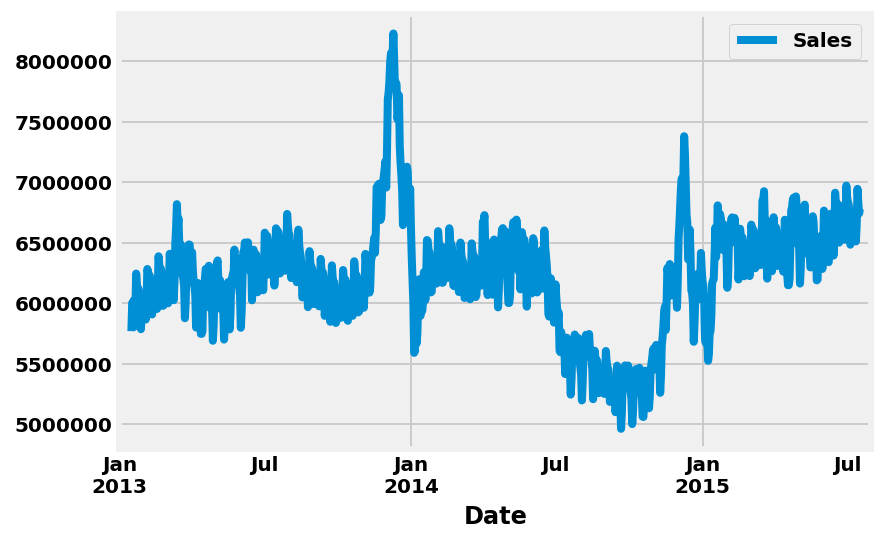

In [36]:
# Let's plot the rolling mean to help us identify larger trends #
daily_store_sales.rolling(window=30, center=True).mean().plot();

The expanding mean uses all of the data points up to the current time to calculate the mean, as opposed to a moving window.

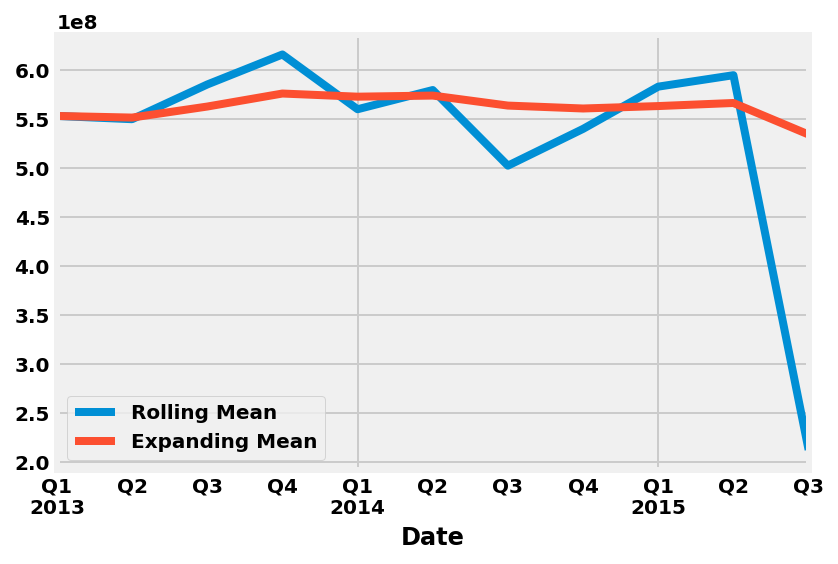

In [37]:
# Let's calculate and plot the expanding mean (resampled by quarter) #
rolling_mean = data.Sales.resample('Q').sum().rolling(window=1, center=False).mean()
expanding_mean = data.Sales.resample('Q').sum().expanding().mean()

fig, ax = plt.subplots();
rolling_mean.plot(legend = True);
expanding_mean.plot(legend = True);
ax.legend(['Rolling Mean', 'Expanding Mean']);

Exponentially weighted windows are one of the most common and effective ways of averaging out noise in time series datasets. The averaging is done using exponential decay on the contribution of prior means, decreasing the contribution of time points that are further in the past.

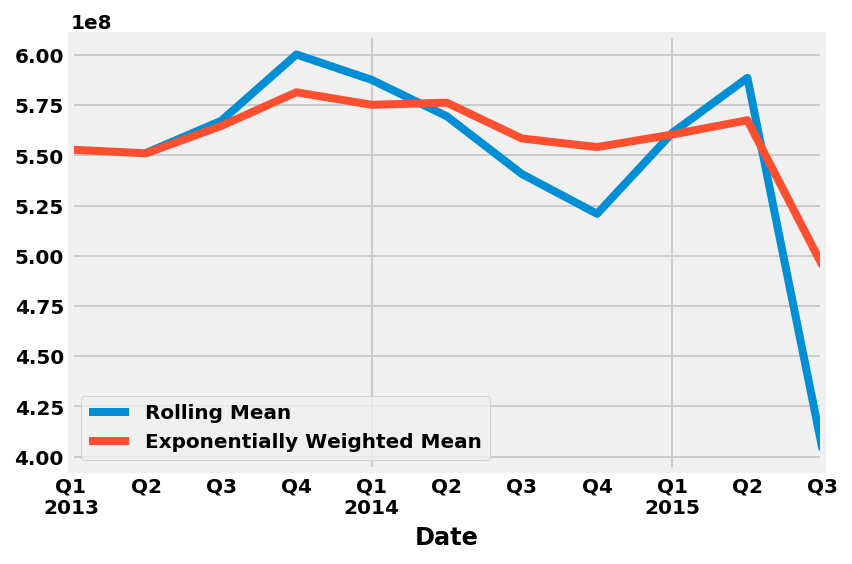

In [38]:
# Let's calculate and plot the exponentially weighted sum along with the rolling sum #
rolling_mean = data.Sales.resample('Q').sum().rolling(window=2, center=True).mean()
exp_weighted_mean = data.Sales.resample('Q').sum().ewm(span=10).mean()

fig, ax = plt.subplots();
rolling_mean.plot(legend = True);
exp_weighted_mean.plot(legend = True);
ax.legend(['Rolling Mean', 'Exponentially Weighted Mean']);

If a time series is stationary, the mean, variance, and autocorrelation will be constant over time. Forecasting methods typically assume the time series you are forecasting on to be stationary (or at least approximately stationary). The most common way to make a time series stationary is through differencing. This converts a time series into the difference between values. This removes trends in the time series and ensures that the mean across time is zero. In most cases, only a single difference (some might require differencing multiple times) will be necessary to remove trends.

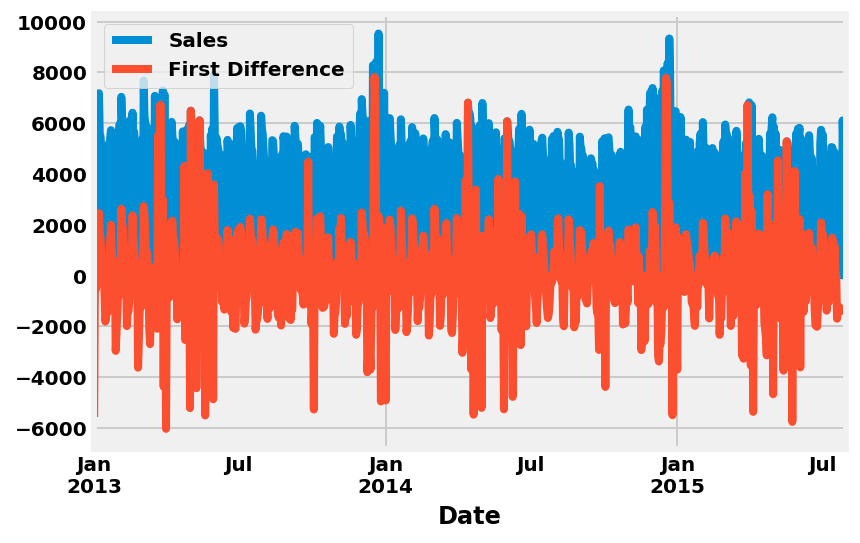

In [39]:
# Let's visualize #
diff = store1_data['Sales'].diff(periods = 7)

fig, ax = plt.subplots();
store1_data['Sales'].plot(legend = True);
diff.plot(legend = True);
ax.legend(['Sales', 'First Difference']);

Another common operation on time series data is shifting or lagging values backward and forward in time. This can help us calculate the percentage of change from sample to sample. Let's take a look at the Rossman data when we apply lagged features.

In [40]:
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7


In [41]:
# Let's shift the sales price by one day #
shifted_forward = store1_data.shift(1)
shifted_forward.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-30,1.0,5.0,5263.0,555.0,1.0,1.0,0,1.0,2015.0,7.0
2015-07-29,1.0,4.0,5020.0,546.0,1.0,1.0,0,1.0,2015.0,7.0
2015-07-28,1.0,3.0,4782.0,523.0,1.0,1.0,0,1.0,2015.0,7.0
2015-07-27,1.0,2.0,5011.0,560.0,1.0,1.0,0,1.0,2015.0,7.0


Note: The first row above now contains NaN values because there wasn't a previous day's data to shift to that day.

In [42]:
# Let's shift the sales prices by five days #
shifted_forward5 = store1_data.shift(5)
shifted_forward5.head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-26,1.0,5.0,5263.0,555.0,1.0,1.0,0,1.0,2015.0,7.0
2015-07-25,1.0,4.0,5020.0,546.0,1.0,1.0,0,1.0,2015.0,7.0
2015-07-24,1.0,3.0,4782.0,523.0,1.0,1.0,0,1.0,2015.0,7.0
2015-07-23,1.0,2.0,5011.0,560.0,1.0,1.0,0,1.0,2015.0,7.0


In [43]:
# Let's use negative numbers to shift the sales values in the reverse direction #
shifted_backward = store1_data.shift(-1)
shifted_backward.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1.0,4.0,5020.0,546.0,1.0,1.0,0,1.0,2015.0,7.0
2015-07-30,1.0,3.0,4782.0,523.0,1.0,1.0,0,1.0,2015.0,7.0
2015-07-29,1.0,2.0,5011.0,560.0,1.0,1.0,0,1.0,2015.0,7.0
2015-07-28,1.0,1.0,6102.0,612.0,1.0,1.0,0,1.0,2015.0,7.0
2015-07-27,1.0,7.0,0.0,0.0,0.0,0.0,0,0.0,2015.0,7.0


Lags can be used to calculate the changes in the values we are tracking with our time series data. Let's create a new column in our Rossman DataFrame that contains the previous day's sales.

In [44]:
store1_data['Prev Day Sales'] = store1_data['Sales'].shift(1).copy()
store1_data.head()

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Prev Day Sales
Date,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,NaN
2015-07-30,1,4,5020,546,1,1,0,1,2015,7,5263.0
2015-07-29,1,3,4782,523,1,1,0,1,2015,7,5020.0
2015-07-28,1,2,5011,560,1,1,0,1,2015,7,4782.0
2015-07-27,1,1,6102,612,1,1,0,1,2015,7,5011.0


In [45]:
# Let's create a new column to store the calculated one-day change in sales at Store 1 #
store1_data['Sales Change'] = store1_data['Sales'] - store1_data['Prev Day Sales'].copy()
store1_data.head()

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Prev Day Sales,Sales Change
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,NaN,NaN
2015-07-30,1,4,5020,546,1,1,0,1,2015,7,5263.0,-243.0
2015-07-29,1,3,4782,523,1,1,0,1,2015,7,5020.0,-238.0
2015-07-28,1,2,5011,560,1,1,0,1,2015,7,4782.0,229.0
2015-07-27,1,1,6102,612,1,1,0,1,2015,7,5011.0,1091.0


Let's quickly recap using a dataset regarding unemployment.

In [46]:
# Let's read in the data #
unemp = pd.read_csv('./data/unemployment.csv')
unemp.head()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [47]:
# Lets check the end of the dataset #
unemp.tail()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
170,1990Q3,5.6%
171,1990Q4,5.9%
172,1991Q1,6.5%
173,1991Q2,6.833%
174,Seasonally adjusted quarterly U.S. unemploymen...,NaN


In [48]:
# Let's clean up the dataframe a bit #
unemp.columns = ['year_quarter', 'unemployment_rate']
unemp['unemployment_rate'] = unemp['unemployment_rate'].map(lambda x: float(str(x).replace('%','')))
unemp.dropna(inplace=True)

unemp.head()

,year_quarter,unemployment_rate
0,1948Q1,3.733
1,1948Q2,3.667
2,1948Q3,3.767
3,1948Q4,3.833
4,1949Q1,4.667


In [49]:
# Let's check the data types #
unemp.dtypes

year_quarter          object
unemployment_rate    float64
dtype: object

In [50]:
# Let's convert the date column to a datetime object and set as index #
unemp['date'] = pd.to_datetime(unemp.year_quarter).dt.to_period('Q')
unemp.set_index('date', inplace=True)

unemp.head()

,year_quarter,unemployment_rate
date,,
1948Q1,1948Q1,3.733
1948Q2,1948Q2,3.667
1948Q3,1948Q3,3.767
1948Q4,1948Q4,3.833
1949Q1,1949Q1,4.667


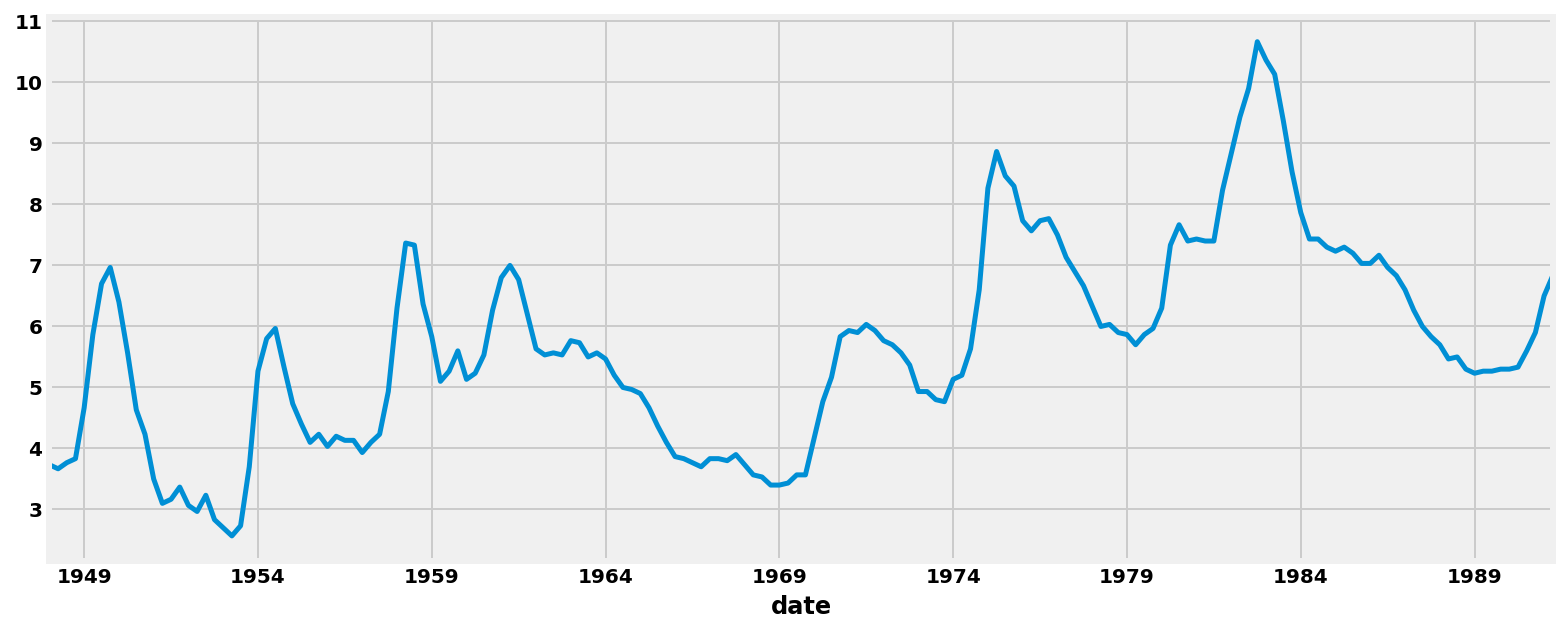

In [51]:
# Let's plot the unemployment rate #
unemp['unemployment_rate'].plot(lw=2.5, figsize=(12,5));

In [52]:
# Let's calculate the rolling mean of years #
yearly = unemp['unemployment_rate'].resample('A').mean().rolling(window=3, center=False).mean()
yearly.head()

date
1948         NaN
1949         NaN
1950    5.002833
1951    4.847333
1952    3.838917
Freq: A-DEC, Name: unemployment_rate, dtype: float64

In [53]:
# Let's extract the dates from the index as timestamps #
date_ticks_orig = unemp.index.to_timestamp()
date_ticks_roll = yearly.index.to_timestamp()

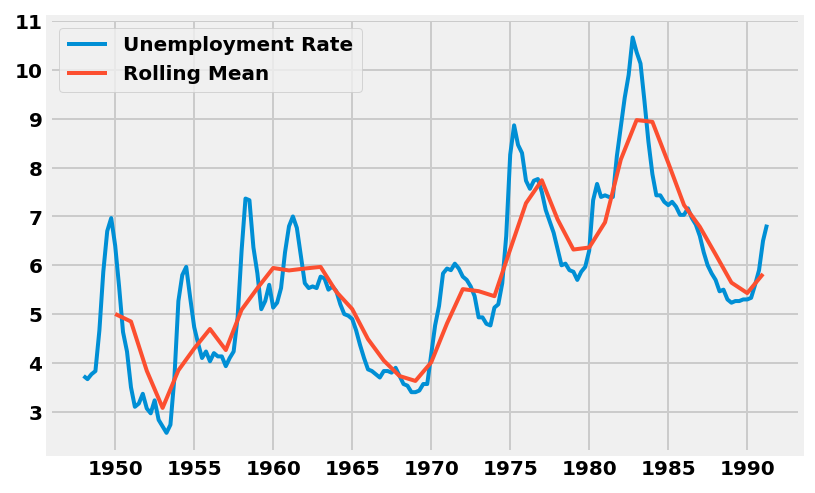

In [54]:
# Let's plot both the unemployment rates and the rolling mean data #
plt.plot(date_ticks_orig, unemp.unemployment_rate.values, lw=2, label='Unemployment Rate');
plt.plot(date_ticks_roll, yearly.values, lw=2, label='Rolling Mean');
plt.legend();

In [55]:
# Let's calculate the rolling median of years #
uroll_w5 = unemp.unemployment_rate.rolling(window=5).median()
uroll_w15 = unemp.unemployment_rate.rolling(window=15).median()

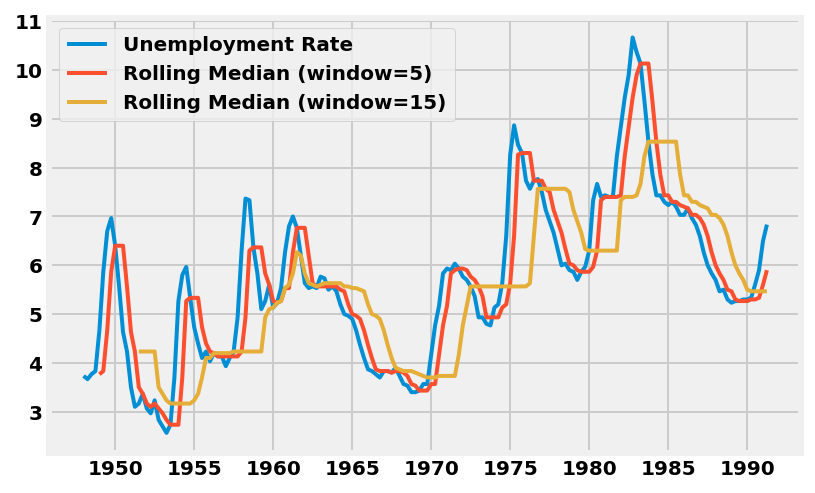

In [56]:
# Let's plot both the unemployment rates and the rolling median data # 
plt.plot(date_ticks_orig, unemp.unemployment_rate.values, lw=2, label='Unemployment Rate');
plt.plot(date_ticks_orig, uroll_w5, lw=2, label='Rolling Median (window=5)');
plt.plot(date_ticks_orig, uroll_w15, lw=2, label='Rolling Median (window=15)');
plt.legend();

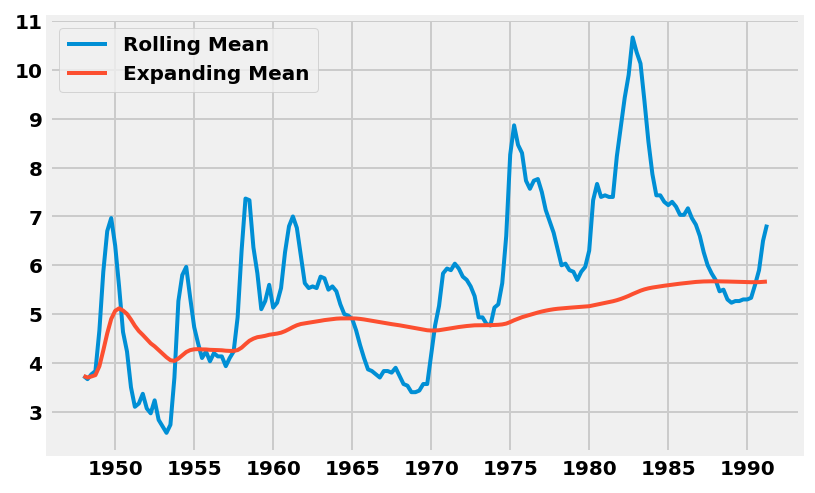

In [57]:
# Let's calculate and plot the expanding mean (resampled by quarter) along with the rolling mean #
date_ticks = unemp.index.to_timestamp()

rolling_mean = unemp.unemployment_rate.resample('Q').sum().rolling(window=1, center=False).mean()
expanding_mean = unemp.unemployment_rate.resample('Q').sum().expanding().mean()

plt.plot(date_ticks, rolling_mean, alpha=1, lw=2, label='Rolling Mean');
plt.plot(date_ticks, expanding_mean, alpha=1, lw=2, label='Expanding Mean');
plt.legend();

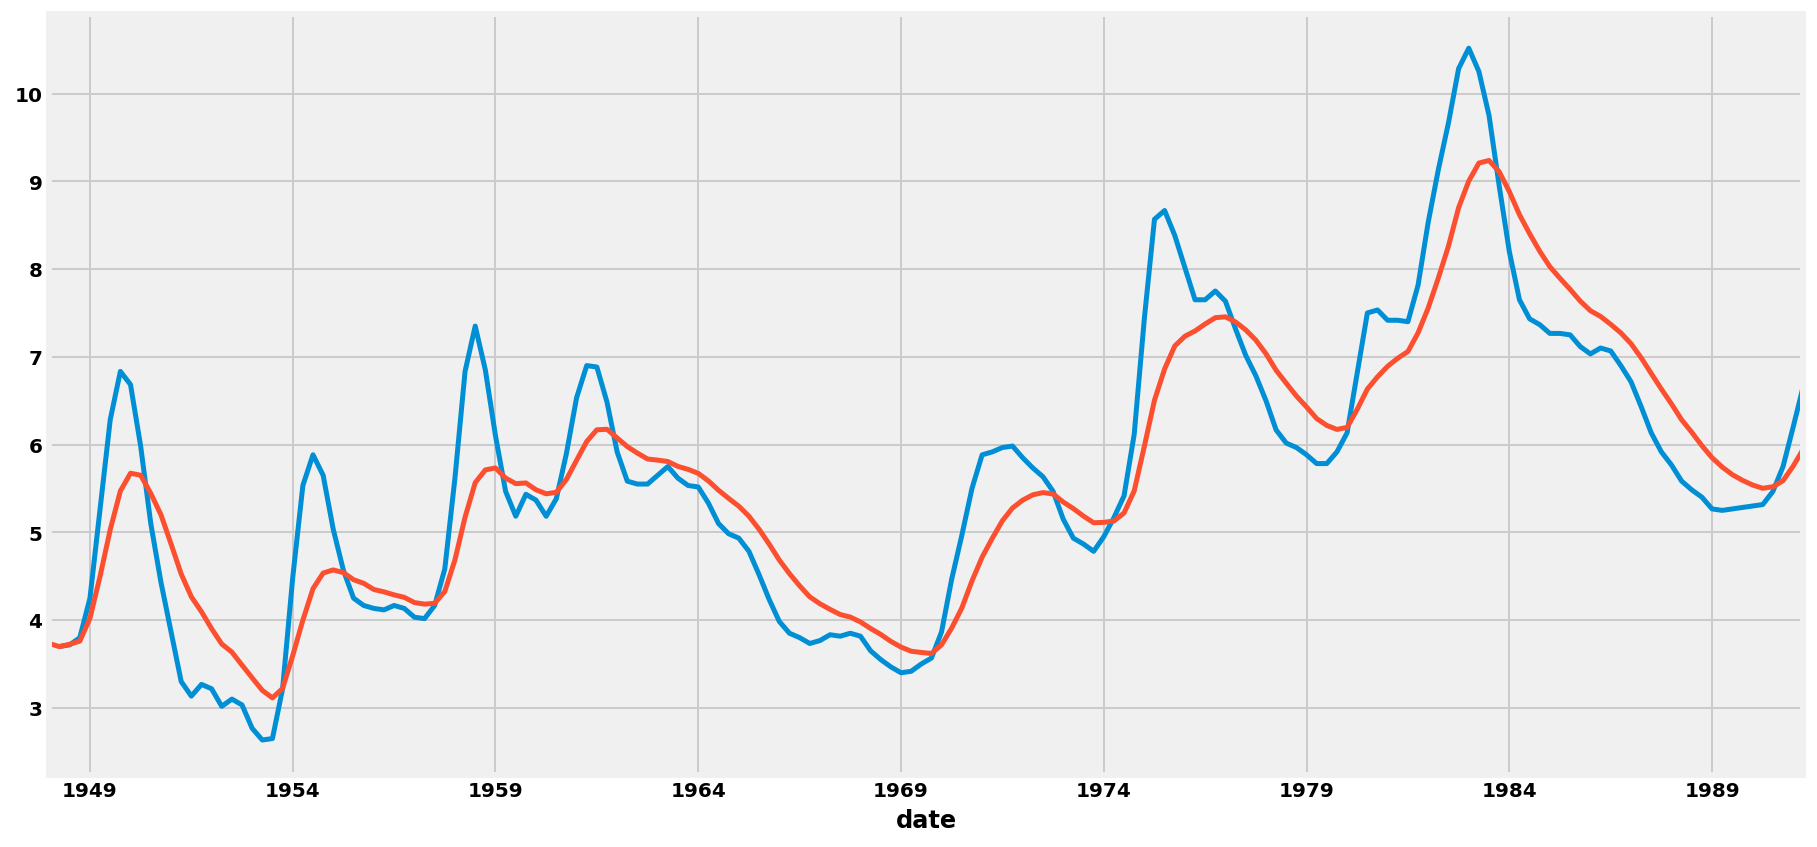

In [58]:
# Let's calculate and plot the exponentially weighted sum along with the rolling sum #
rolling_mean = unemp.unemployment_rate.resample('Q').sum().rolling(window=2, center=True).mean()
exp_weighted_mean = unemp.unemployment_rate.resample('Q').sum().ewm(span=10).mean()

ax = rolling_mean.plot(lw=2.5, figsize=(14,7));
exp_weighted_mean.plot(ax=ax, lw=2.5);

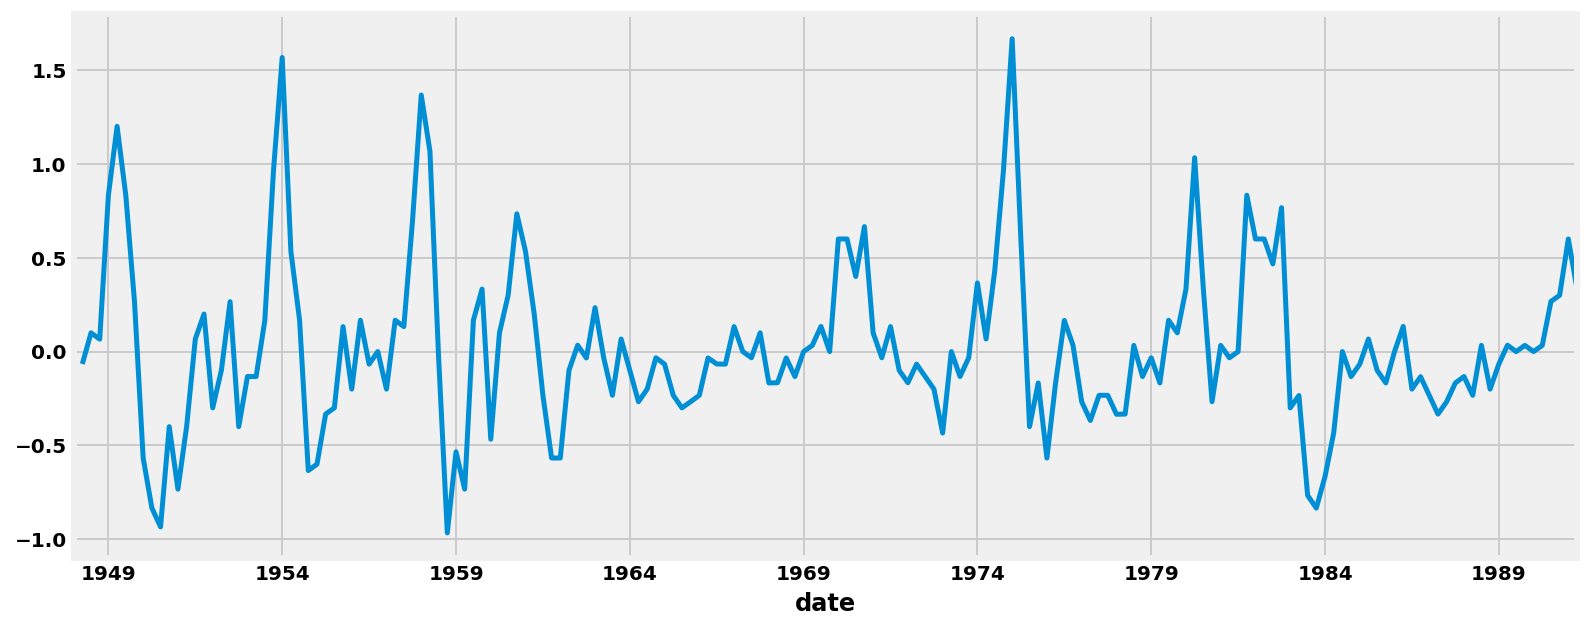

In [59]:
# Let's difference the unemployment rate and visualize #
unemp['unemp_diff'] = unemp['unemployment_rate'].diff()
unemp['unemp_diff'].plot(lw=2.5, figsize=(12,5));